In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from tqdm.notebook import tqdm

import os
import re
import socket
import subprocess
import sys

sns.set_style("whitegrid")
np.set_printoptions(suppress=True, precision=2, threshold=20)
pd.set_option('display.max_rows', 500)
sys.path += ['../src/']

display(HTML("<h3>Runned on %s</h3><h4>Last commit: %s</h4><h4>Conda env: %s</h4>" % (
    socket.gethostname(),
    subprocess.run(["git","log", "-1", "--pretty=%h %s"],
        check=False, capture_output=True).stdout.decode() or 'none.',
    (re.findall(""".*envs[\\\/](.*?)[\\\/]""", sys.executable) or [sys.executable])[0]
)))

In [2]:
sns.set_theme(context='poster', style='white')

import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['legend.frameon'] = 'True'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['text.usetex'] = True

In [3]:
eps = 0.5
mu = 0.3
beta = 15
T = 10000
# N = 50

murange = np.linspace(0, 0.5, 501)
generation_seed = 1

n_ic = 10
n_trials = 10
t_range = np.array([1000, 5000, 10000, 20000]) # 
n_range = np.array([100, 500, 1000])

In [4]:
dfs = []
for c, T in enumerate(t_range):
    dfs_singleN = []
    for ct, N in enumerate(n_range):
        try:
            df_tmp = pd.read_csv(f'../outputs/mle_mu_over_N_T_{n_trials}_{eps}_{mu}_{beta}_{N}_{T}_{generation_seed}.csv', index_col=0)
            df_tmp = df_tmp.stack().reset_index()
            df_tmp['N'] = N
            if N==100:
                df_tmp['T'] = T-300
            elif N==500:
                df_tmp['T'] = T
            elif N==1000:
                df_tmp['T'] = T+300
            else:
                df_tmp['T'] = T-250
            df_tmp['eps'] = eps
            df_tmp['mu'] = mu
            df_tmp.columns = ['x0i', 'trial', 'mu_hat', 'N', 'T', 'eps', 'mu']
            df_tmp['mu_err'] = df_tmp.mu_hat - df_tmp.mu
            dfs_singleN.append(df_tmp)
        except:
            continue
    if len(dfs_singleN)>0:
        dfs.append(pd.concat(dfs_singleN))

In [5]:
len(dfs)

4

In [6]:
dfs = pd.concat(dfs)

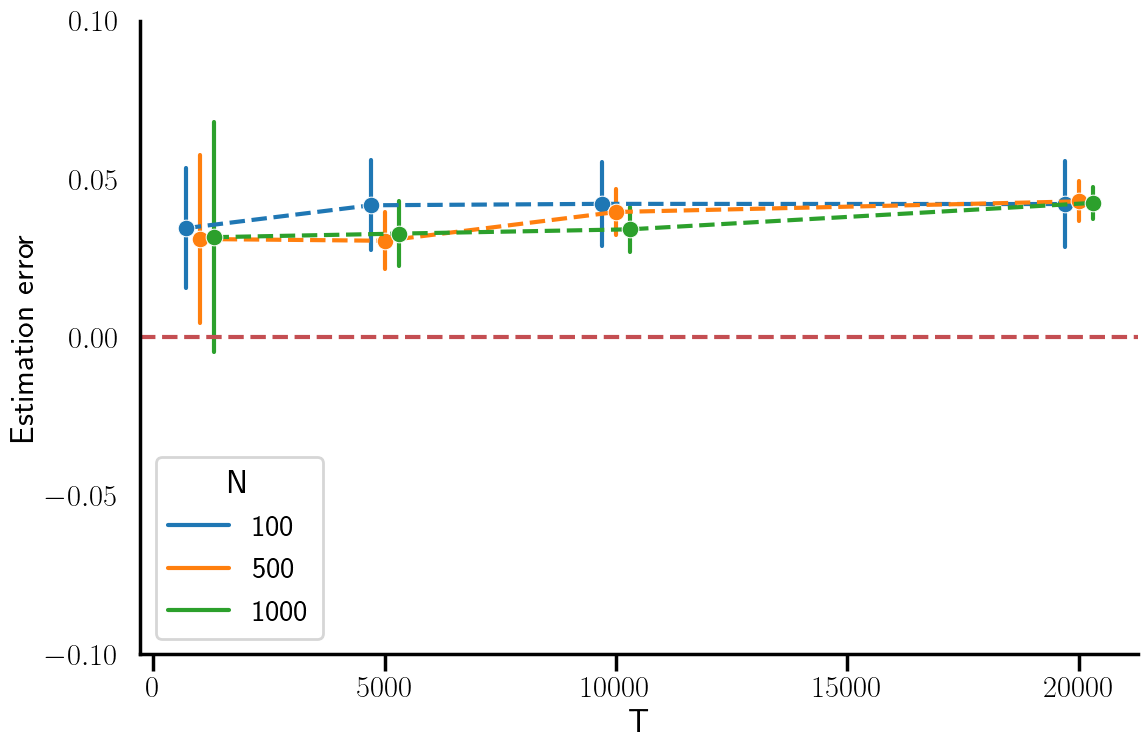

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=dfs, x='T', y='mu_err', hue='N', errorbar=('sd', 1), err_style='bars', marker='o', linestyle='--', palette='tab10')
plt.axhline(0., ls='--', c='r')
plt.ylim([-0.1, 0.1])
plt.ylabel('Estimation error')
plt.xticks([0, 5000, 10000, 15000, 20000])
plt.yticks([-0.1, -0.05, 0., 0.05, 0.1])
sns.despine()
plt.tight_layout()
plt.savefig(f'../figs/mu_over_N_T_mu_{mu}_eps_{eps}_beta_{beta}_err.pdf')

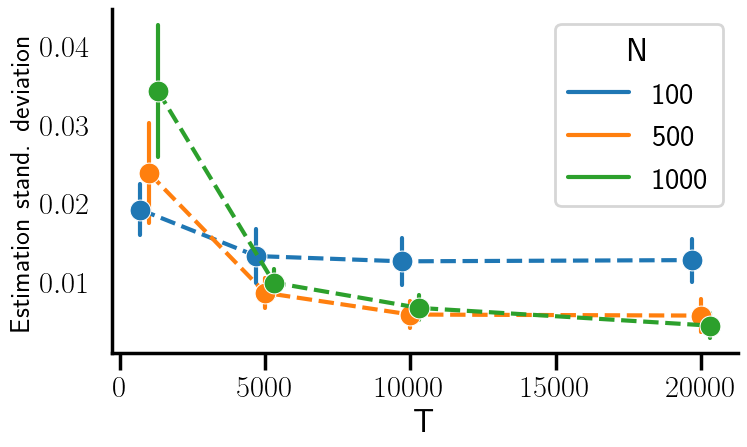

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

# for df in dfs:
# df.groupby('N').mu_hat.mean().plot(style='o-')
sns.lineplot(data=dfs.groupby(['N', 'T', 'eps', 'mu', 'x0i']).mu_hat.std().reset_index(), 
             x='T', y='mu_hat', hue='N', marker='o', linestyle='--', palette='tab10', errorbar=('sd', 1), err_style='bars', ms=15)
# plt.legend(dfs[0].mu.unique(), title="mu")
# plt.plot(mu_range, mu_range, ls='--', c='r')
# plt.axhline(eps, ls='--', c='r')
# plt.ylim([0., 1])
# plt.xlim([0., 1])
plt.ylabel('Estimation stand. deviation', fontsize=20)
plt.yticks([0.01, 0.02, 0.03, 0.04])
plt.xticks([0, 5000, 10000, 15000, 20000])
sns.despine()
plt.tight_layout()
plt.savefig(f'../figs/mu_over_N_T_mu_{mu}_eps_{eps}_beta_{beta}_var.pdf')